# Week 3 - Project 2

### Team 5

#### Goal:
1. Identify a large 2-node network.  Your data should consist of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method (ex. island method)
3. What can you infer about each of the distinct groups?


### 1. Importing our 2-node network
The Facebook-like Forum Network was attained from the Tore Opsahl website: https://toreopsahl.com/datasets/#online_forum_network. The data represents an two-mode network among 899 users and 522 topics, where the connections are weighted on the ties based on the number of messages or characters that a user posted to a topic.

In [3]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import math
import community
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline

request = requests.get("https://raw.githubusercontent.com/Galanopoulog/DATA620-Project-2/master/p2_data.csv").content
data = pd.read_csv(io.StringIO(request.decode('utf-8')))

In [114]:
data.head()

,user,topic,weight
0,1,1,1
1,1,39,9
2,1,102,2
3,1,154,1
4,1,357,5


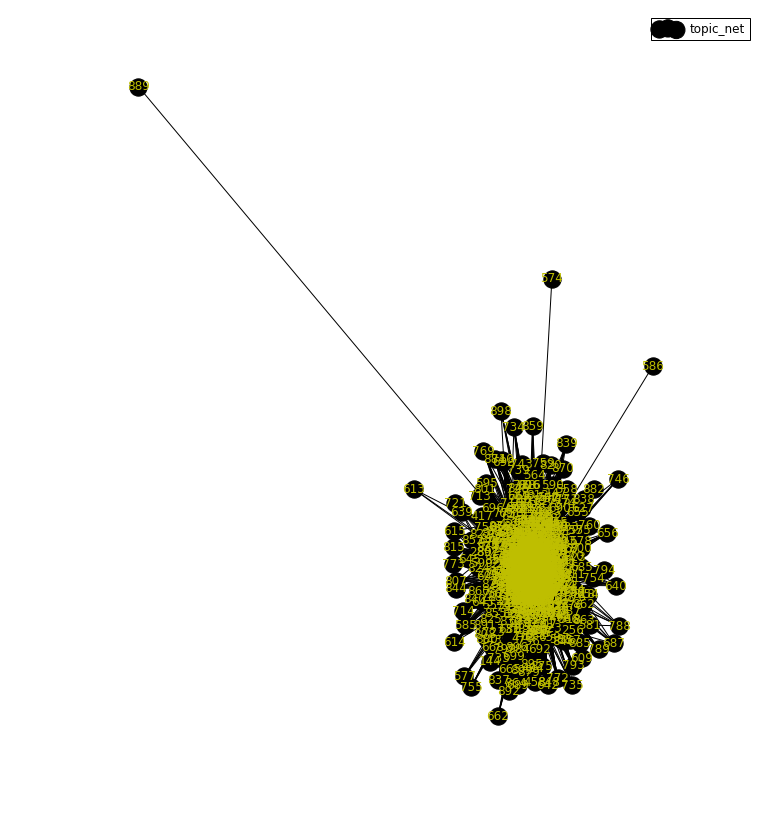

In [5]:
fb_csv = csv.reader(open('p2_data.csv'))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

plt.figure(figsize=(10,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
weights = [math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

# Entire plot
net.draw_spring(topic_net, label = 'topic_net', node_color='k',with_labels=True,node_size =300,font_color ='y')
plt.legend(["topic_net"])
plt.show()

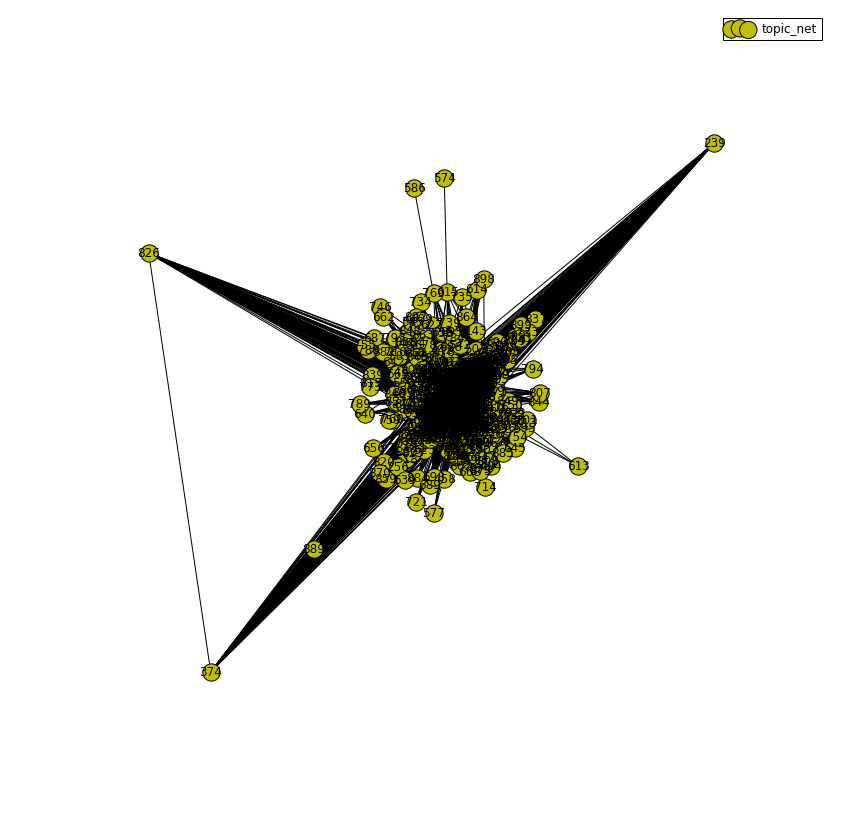

In [6]:
# Subgraph of topics
plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
topic_net = max(net.connected_component_subgraphs(topic_net),key=len)
weights = [math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

net.draw_spring(topic_net, label = 'topic_net', node_color='y',with_labels=True,node_size =300,font_color ='k')
plt.legend(["topic_net"])
plt.show()

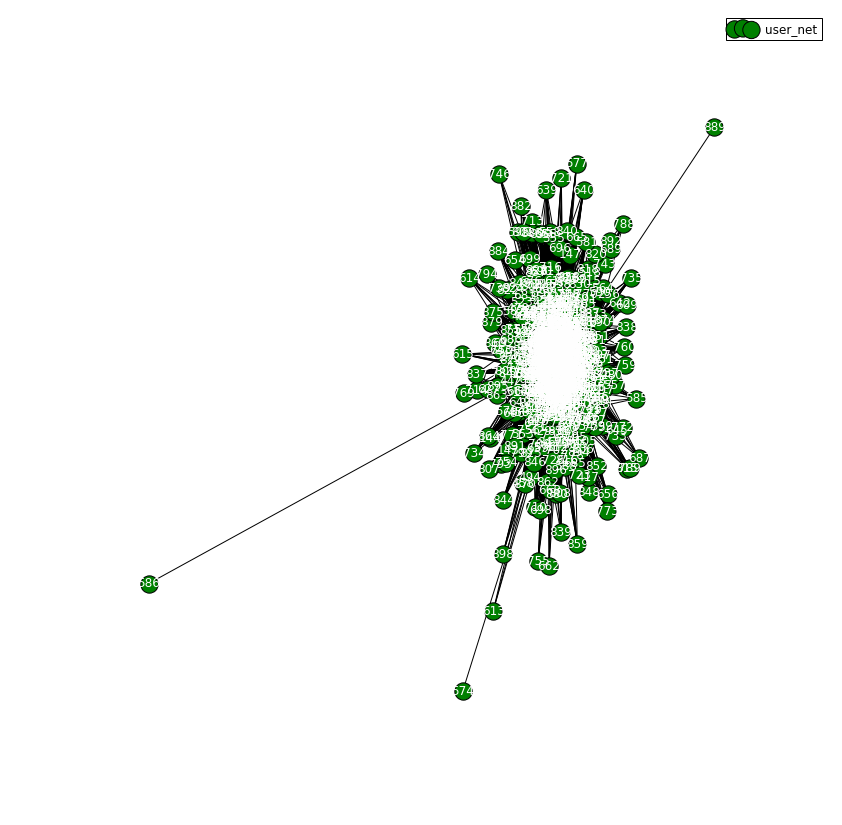

In [7]:
# Subgraph of users
plt.figure(figsize=(11,11))
user_net = bi.weighted_projected_graph(fb_g, users, ratio=False)
user_net = max(net.connected_component_subgraphs(user_net),key=len)
weights = [math.log(edata['weight'])for f,t,edata in user_net.edges(data=True)]

net.draw_spring(topic_net, label = 'user_net', node_color='g', with_labels=True, node_size =300, font_color ='w')
plt.legend(["user_net"])
plt.show()

### 2. Reducing the Network

In [206]:
# Island Methond
# Trimming nodes with less weight
def trim_edges(fb_g,weight=1):
    fb_g2=net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if edata['weight']> weight:
            fb_g2.add_edge(f, to,edata)
    return fb_g2

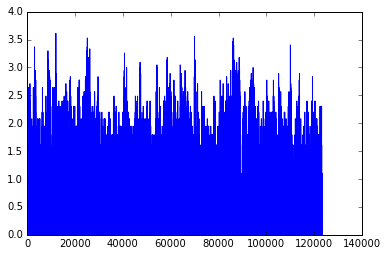

In [9]:
plt.plot(weights)

In [10]:
usernet_trim = trim_edges(user_net,weight= math.exp(0.9))

In [11]:
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

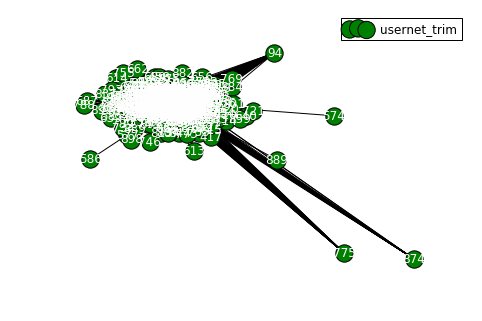

In [12]:
net.draw_spring(topic_net, label = 'usernet_trim', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["usernet_trim"])
plt.show()

### 3. Inferences About Groups

In [13]:
# Function defined sorted_map for sorting books based on their centrality value
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [14]:
# Compute Degree Measure
d = net.degree(usernet_trim)
ds = sorted_map(d)
ds[0:10]

[('100', 458),
 ('13', 430),
 ('67', 425),
 ('18', 407),
 ('164', 403),
 ('82', 392),
 ('12', 379),
 ('10', 344),
 ('47', 340),
 ('377', 337)]

In [17]:
# Is the graph directed?
user_ud = usernet_trim.to_undirected()
fb_components = net.connected_component_subgraphs(user_ud)
net.is_directed(user_ud)

False

In [18]:
#Find Communities 
part = community.best_partition(user_ud)
mod = community.modularity(part, user_ud)

AttributeError: 'module' object has no attribute 'best_partition'

In [19]:
values = [part.get(node) for node in user_ud.nodes()]
plt.figure(figsize=(15,15))
pos = net.drawing.spring_layout(user_ud)
net.draw(user_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

NameError: name 'part' is not defined

In [20]:
# Examine node data to determine top user centralities
print user_ud.nodes(data=True)[0:5]

[('198', {}), ('344', {}), ('819', {}), ('346', {}), ('347', {})]


In [176]:
user_ud = fb_g

# Degree Centrality
dcent = net.degree_centrality(user_ud)
dcent_s = sorted_map(dcent)
dcent_s[0:19]

[('10', 0.1419068736141907),
 ('13', 0.1352549889135255),
 ('67', 0.12527716186252771),
 ('164', 0.1130820399113082),
 ('82', 0.1130820399113082),
 ('100', 0.11086474501108648),
 ('75', 0.10643015521064302),
 ('12', 0.10532150776053215),
 ('18', 0.10199556541019955),
 ('59', 0.09645232815964523),
 ('91', 0.09312638580931264),
 ('19', 0.08758314855875832),
 ('208', 0.08758314855875832),
 ('290', 0.07982261640798226),
 ('20', 0.0787139689578714),
 ('291', 0.07760532150776053),
 ('16', 0.07649667405764966),
 ('194', 0.07427937915742794),
 ('228', 0.07206208425720621)]

In [189]:
# Closeness Centrality
ccent = net.closeness_centrality(user_ud)
ccent_s = sorted_map(ccent)
ccent_s[0:19]

[('67', 0.48169059178836304),
 ('13', 0.48143119997803),
 ('100', 0.48039642039720676),
 ('82', 0.4722756145584796),
 ('10', 0.47152834301645663),
 ('18', 0.4675824991418419),
 ('12', 0.4663629308081387),
 ('164', 0.4649078202595953),
 ('290', 0.46107155150036194),
 ('75', 0.45823564241886305),
 ('377', 0.45613149916285806),
 ('59', 0.4535858642106554),
 ('47', 0.4515241102824251),
 ('16', 0.4512961829173154),
 ('19', 0.4476803897642473),
 ('228', 0.44611663590778533),
 ('91', 0.44589413384498844),
 ('208', 0.4423640466893626),
 ('319', 0.4423640466893626)]

In [190]:
# Betweenness Centrality
bcent = net.betweenness_centrality(user_ud)
bcent_s = sorted_map(bcent)
bcent_s[0:19]

[('10', 0.04870054855901083),
 ('13', 0.043636455651861604),
 ('67', 0.04021093020234753),
 ('59', 0.037419185087766677),
 ('82', 0.034104893838560746),
 ('75', 0.03137359080678785),
 ('12', 0.030166662808415286),
 ('164', 0.029414381926589902),
 ('100', 0.027354226140679394),
 ('18', 0.025655290471334906),
 ('208', 0.02261180318548813),
 ('91', 0.022129506551050827),
 ('194', 0.02203705595544957),
 ('19', 0.019721700816460862),
 ('291', 0.01961937804699004),
 ('8', 0.0186682933780591),
 ('290', 0.018104714980277097),
 ('252', 0.01483277410373809),
 ('16', 0.014820206290464074)]

In [191]:
# Top 0 nodes for each Centrality
TopD = [item[0] for item in dcent_s[0:19]]
TopB = [item[0] for item in bcent_s[0:19]]
TopC = [item[0] for item in ccent_s[0:19]]
TopNodes = TopD + TopB + TopC

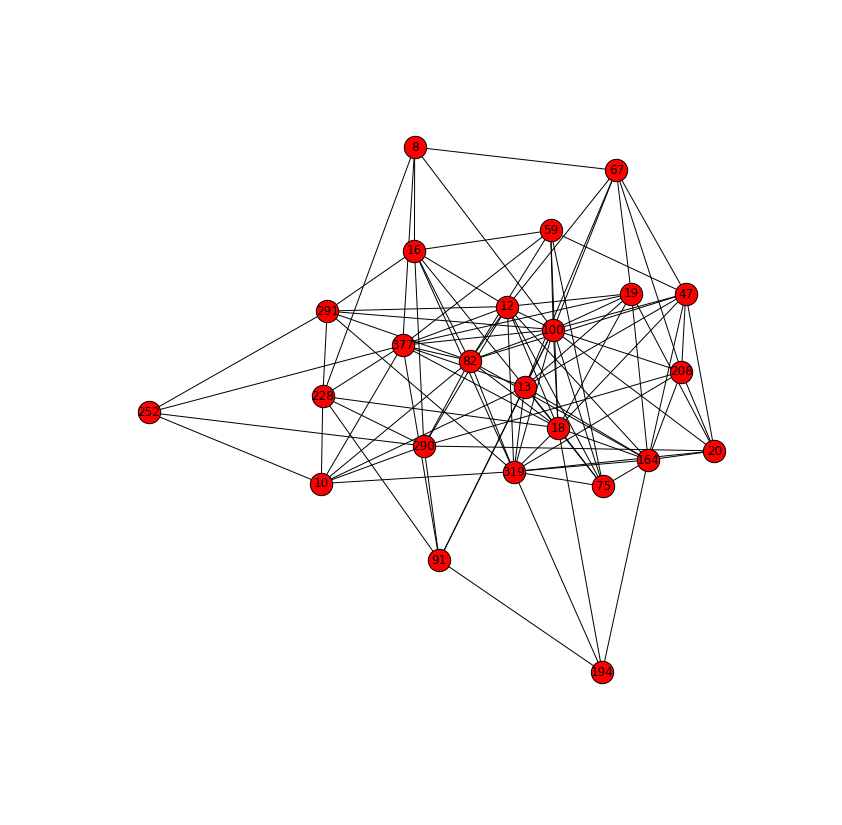

In [205]:
# Subgraph of Most Central Individuals
plt.figure(figsize=(11,11))
G = net.Graph(user_ud)

nodes = G.nodes()
edges = G.edges()

H = nx.path_graph(903)
H.add_nodes_from(G)
H.add_edges_from(G.edges())

H2 = H.subgraph(TopNodes)
centralcenter = net.center(H2)
       
net.draw(H2, with_labels=True, node_color = "r", node_size = 500)